<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones básicas en pandas
* Preprocesamiento y exploración inicial de datos
* Regresión Lineal Multivariada
* PCA, LDA
* Selección de atributos _from scratch_, Métodos Wrapper e Información Mutual
* Selección de modelos por _Cross Validation_


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o un por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "avalderr") al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea1]
* Fecha de entrega y presentaciones: 26 de Abril. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Aprendizaje con regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes seran valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_.

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

La regresión lineal, modelo que busca la mejor forma de combinar linealmente variables para predecir otra variable numérica es una de las herramientas más básicas a nuestra disposición. Sin embargo se puede encontrar muchas aplicaciones a esta aproximación con buenos resultados, y suele ser un buen punto de partida para problemas totalmente desconocidos por su velocidad de implementar y simpleza de interpretar. Además, al igual que muchas de las técnicas de _Machine Learning_, no tiene un ambito de uso definido, es decir podemos aplicar un metodo similar para problemas radicalmente distintos. 

<img src="https://i.stack.imgur.com/cNJQs.png" style="height:50%;" />

En esta primera parte de la tarea, trabajaremos con un _dataset_ de _Kaggle_ llamado "_Black Friday_", el cual contiene alrededor de medio millón de registros. Este _dataset_ contiene diversas informaciones sobres los consumidores (edad, ocupación, género, entre otros) y el valor de la compra que realizaron al momento de la medición. Pueden descargar el _dataset_ desde https://www.kaggle.com/mehdidag/black-friday. Este _dataset_ fue pensado para intentar de predecir el valor de compra de un cliente en funcion de sus caracteristicas, sin embargo uno puede realizar distintas regresiones y tratar, por ejemplo, de predecir el rango de edad de un cliente basado en sus otras caracteristicas incluyendo el valor de su compra. En esta primera parte utilizaremos el set de datos para hacer regresión lineal sobre el valor de compra, es decir la variable a predecir es el valor de compra. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style()
%matplotlib inline

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Cuente los valores N/A de cada columna con el siguiente código y explique brevemente porque en un primer momento preferiremos eliminar la segunda y tercera categoría del producto.

 Cuantos registros hay de mujeres y de hombres? Cuanto gastan en promedio los distintos rangos de edad? Entregue alguna otra medicion que le parezca interesante y permita familiarizarse con los datos.

In [4]:
print(data.isna().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


### R:
Si bien, la ausencia de un dato dentro de un set de datos se puede trabajar, por lo general hay que tener conocimiento de dominio, o en su defecto aplicar alguna técnica de imputación de datos. Acá como no conocemos si los datos faltantes pueden ser por que falta esta información o en su defecto, simplemente al producto comprado no se puede asociar otra categoría de pertenencia.

### Registros de cuantas mujeres y cuantos hombres

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


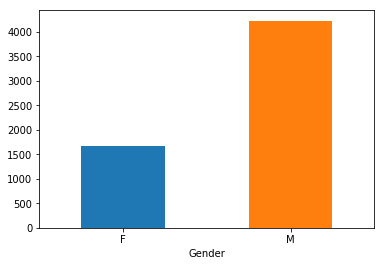

In [5]:
data.groupby("Gender").User_ID.nunique().plot.bar(rot=0)
print(data.groupby("Gender").User_ID.nunique())
plt.show()

### Posibles categorias de producto

In [6]:
print("Categoría 1", np.sort(data['Product_Category_1'].unique()))
print("Categoría 2", np.sort(data['Product_Category_2'].unique()))
print("Categoría 3", np.sort(data['Product_Category_3'].unique()))

Categoría 1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Categoría 2 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Categoría 3 [ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]


### Compras promedio según la edad

In [7]:
data.groupby('Age').mean()['Purchase']

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

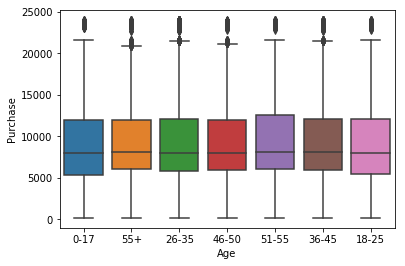

In [8]:
sns.boxplot(x='Age',y='Purchase',data=data)
plt.show()

### Cantidad de compras segun la edad

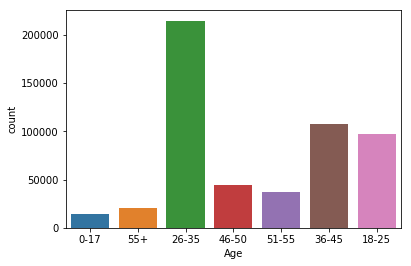

In [9]:
sns.countplot(x="Age",data=data)
plt.show()

### Cantidad de registros asociados a la categoria de ciudad

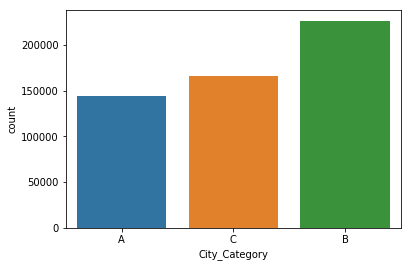

In [10]:
sns.countplot(x="City_Category",data=data)
plt.show()

 #### 1.b Columnas descartadas
De los tipos de datos que tenemos cuales resultarán problematicos para realizar regresión lineal? Del dato "City_Category", cuantos valores distintos existen? (puede usar el metodo .unique por ejemplo)
Porqué a pesar de ser dato numerico las columnas "Product_Category" podrían comportarse mal con la regresión lineal?

In [11]:
print(data.dtypes)
data = data.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


### R:
City category fue contestado anteriormente en la descripción de datos

Product Category puede ser complicado debido a que pertenece a una codificación de datos categóricos, donde perfectamente puede ser completamente arbitraria. Si bien una escala en teoría podría funcionar (Pequeño: 0, Mediano:1, Grande:2) debido a que existe un orden y estas podrían interpretar dicha escala; pero cuando se tienen variables categorías no ordinales, esta codificación puede presentar problemas (Azul: 0, Rojo:1 -> Rojo > Azul?)


 #### 1.c  Datos Categoricos
 Transformaremos ahora los datos no numericos a datos numéricos. Para esto transformaremos el género a una variable binaria como muestra el código siguiente. Transforme todos los datos problematicos de manera similar. Discuta la eleccion realizada para "City_Category", más adelante haremos otra propuesta. Para los rangos de edad puede utilizar el promedio de ambos valores. Discuta si tiene alguna relevancia la elección del valor numerigo (_e.g._ 1 ó 0 para mujer) para el modelo de regresión lineal. Es así en todos los casos o solo para variables binarias?
 Por qué el dato "Occupation" no podemos utilizarlo directamente a pesar de ser numérico? Que solucion nos da el metodo `get_dummies` de pandas?

### R:
Entendamos la naturaleza de los datos categóricos, para la construcción de los diccionarios

In [12]:
print(data['Gender'].unique())
print(data['Age'].unique())
print(data['City_Category'].unique())
print(data['Stay_In_Current_City_Years'].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


### R:
Sobre la eleccion para la "City_Category"
La caracteristicas categoricas como "Gender" si pueden afectar 
El metodo "get_dummies" de pandas hace una codificacion de una variable categorica del tipo "one-hot encoding". Esta transforma una variable categorica $C$ con $k$ posibles valores categoricos, en $k-1$ (o $k$, dependiendo de la implementación) variables binarias. En el caso de $k-1$ variables, uno puede representar cada categoria como un valor binario, y luego la categoria restante, como la auscencia de un valor binario de las categorias: ej: 

$C$ = [azul, rojo, verde] lo transformamos a $(c_1,c_2)$, luego:

$(0,0)$ = azul  
$(0,1)$ = rojo  
$(1,0)$ = verde    

In [13]:
gender_dict = {'F':1,'M':0}
age_dict = {'0-17':0,'18-25':1, '26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
siccy_dict = {'0':0,'1':1,'2':2,'3':3,'4+':5}
city_cat_dic = {'A':-1, 'C':0, 'B':1}

data['Gender'] = data.Gender.apply(lambda x: gender_dict[x])
data['Age'] = data.Age.apply(lambda x: age_dict[x])
data['Stay_In_Current_City_Years'] = data.Stay_In_Current_City_Years.apply(lambda x: siccy_dict[x])
data['City_Category'] = data.City_Category.apply(lambda x: city_cat_dic[x])

#city_dummies = pd.get_dummies(data.City_Category,prefix="city") #¨preferiria utilizar esta transformación
occupation_dummies = pd.get_dummies(data.Occupation,prefix="occupation")
col = list(data.columns)
#col.remove('City_Category') #con cities dummies, hay que eliminar la columna
col.remove('Occupation')
data_pre = data[col]
#data_pre = data_pre.join(city_dummies) #añadimos los dummies
data_pre = data_pre.join(occupation_dummies)
data_pre.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,occupation_0,occupation_1,occupation_2,occupation_3,...,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20
0,1,0,-1,2,0,8370,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,-1,2,0,15200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,-1,2,0,1422,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,-1,2,0,1057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6,0,5,0,7969,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


  #### 1.d  Separación de datos
 Separaremos los datos en _train_, _validation_ y _test_ con 75%, 15% y 10% de los datos respectivamente. Verifique que se cumplen aproximadamente las proporciones. Luego separe el _target_ del resto de las variables que consideraremos. 

In [14]:
data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
print("train:{:.2f}%, validation:{:.2f}%, test:{:.2f}%".format(len(data_pre_train)/len(data)*100,len(data_pre_val)/len(data)*100,len(data_pre_test)/len(data)*100))
data_x_train = data_pre_train.drop(columns='Purchase')
data_y_train = data_pre_train['Purchase']

data_x_val = data_pre_val.drop(columns='Purchase')
data_y_val = data_pre_val['Purchase']

data_x_test = data_pre_test.drop(columns='Purchase')
data_y_test = data_pre_test['Purchase']


train:75.00%, validation:15.00%, test:10.00%


 #### 1.e  Estandarización
 Utilizaremos `Standar_Scaler` para estandarizar los datos antes de entrenar. Que ventaja tiene en su opinion el tener un objeto que permite estandarizar (y hacer la transformación inversa) frente a hacer la opreación aritmetica "manualmente"? Note el cambio de tipo entre `data_x_train` y `x_train`. Tiene utilidad estandarizar el _target_ para este modelo? Guarde el _target_ estandarizado de todas formas para comparar más adelante.

### R:

La utilidad que tiene el tener el objeto (en este caso, StandardScaler), permite tener en primer lugar una implementación baseline, y confiada por la comunidad la cual cumple con la tarea (No hay que reinventar la rueda). Segundo, la facilidad de poder aplicar las transformaciones necesarias para datos nuevos (validación / testing/ datos en producción) convenientemente en un solo objeto. Tercero, para la aplicación en producción, este objeto lo podemos exportar fácilmente utilizando la librería pickle, cosa de poder facilitar el pipeline.

Por lo general, no es necesario estandarizar la variable de target, pero puede ser util para algoritmos que aprovechan que los datos estén centrados. Al momento de evaluar, hay que aplicar la función inversa de transformación sobre los datos escalados, para poder otorgar valores reales en el dominio original del problema.

In [15]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaler_x.fit(data_x_train)
x_tr = scaler_x.transform(data_x_train)
x_val = scaler_x.transform(data_x_val)
x_test = scaler_x.transform(data_x_test)

scaler_y.fit(data_y_train.values.reshape(-1,1))
y_tr = scaler_y.transform(data_y_train.values.reshape(-1,1))
y_val = scaler_y.transform(data_y_val.values.reshape(-1,1))
y_test = scaler_y.transform(data_y_test.values.reshape(-1,1))

 #### 1.f Primera Regresión
 Realice una regresión lineal con los datos escalados y no escalados. Compare sus _scores_. Cual es la formula del _score_ que utiliza el regresor (puede buscar en la documentación)? Qué interpretación se le puede dar al _score_? Puede concluir que los datos escalados o no escalados entregan un mejor modelo? Sobre que conjunto de datos (_train_, _test_ o _valitdation_) deberíamos comparar el _score_?

In [16]:
reg_scaled = LinearRegression()
reg_scaled.fit(x_tr,y_tr)
train_score = reg_scaled.score(x_tr,y_tr)
val_score = reg_scaled.score(x_val,y_val)
test_score = reg_scaled.score(x_test,y_test)
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006655, validation score:0.007396, test score:0.006393


In [17]:
reg_unscaled = LinearRegression()
reg_unscaled.fit(x_tr,data_y_train.values.reshape(-1,1))
train_score = reg_unscaled.score(x_tr,data_y_train.values.reshape(-1,1))
val_score = reg_unscaled.score(x_val,data_y_val.values.reshape(-1,1))
test_score = reg_unscaled.score(x_test,data_y_test.values.reshape(-1,1))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006655, validation score:0.007396, test score:0.006393


In [18]:
reg_unscaled2 = LinearRegression()
reg_unscaled2.fit(data_x_train,data_y_train.values.reshape(-1,1))
train_score = reg_unscaled2.score(data_x_train,data_y_train.values.reshape(-1,1))
val_score = reg_unscaled2.score(data_x_val,data_y_val.values.reshape(-1,1))
test_score = reg_unscaled2.score(data_x_test,data_y_test.values.reshape(-1,1))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006656, validation score:0.007399, test score:0.006393


### R:

El metodo Score de la regresion lineal implementado en la libreria scikit-learn, corresponde al $R^2$, el cual esta definido por:

$R^2=$ $\sigma_{XY}^2 \over \sigma_X^2 \sigma_Y^2$

Esta metrica es igual al coeficiente de correlación de pearson, el cual nos entrega el que tanto se ajusta nuestra regresion a los datos. El $R^2$ toma valores de 1 cuando nos ajustamos perfectamente, un modelo constante que siempre entrega el mismo resultado tiene un $R^2$ de 0. Esta metrica puede ser negativa.

Podemos medir el score de las tres set de datos, la idea principal es ver el poder de generalización de nuestro modelo, mediante las acciones que tomamos con el set de entrenamiento, para luego validar y finalmente probar con el set de testing. En este caso, el modelo que mejor funciona (validacion y testing) es la regresion lineal sin los datos escalados. Pero, para poder afirmar esto necesitariamos hacer varias corridas y varios k-fold para poder luego hacer un test de hipotesis para corrobar si las diferencias son significativas.

 #### 1.g  Tranformaciones simples
 Grafique como se distribuyen los precios, apoyese en el siguiente código. Recuerde que los gráficos deben ir acompañados de título, nombre de ejes entre otros.
 Viendo el gráfico, pareciera que una representación lineal funcionará bien para modelar este tipo de datos?
 
Prueba algunas transformaciones simples, como logaritmo o raiz cuadrada y comente los gráficos. 

Estos gráficos permiten concluir algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio?

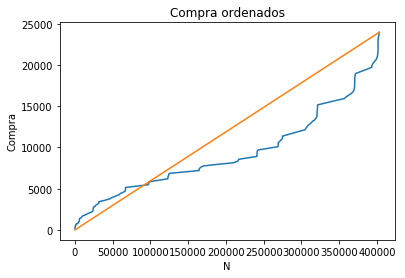

In [19]:
plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    data_y_train.sort_values(),
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,((data_y_train.sort_values())).max(),
                num=data_y_train.shape[0])
)
plt.ylabel('Compra')
plt.xlabel('N')
plt.title('Compra ordenados')
plt.show()

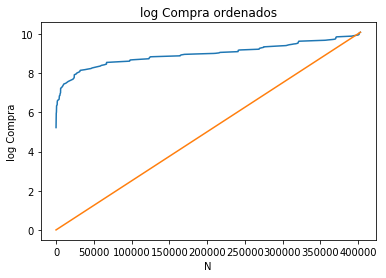

In [20]:
transformed_log = np.log(data_y_train.sort_values())

plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    transformed_log,
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,transformed_log.max(),
                num=data_y_train.shape[0])
)
plt.ylabel('log Compra')
plt.xlabel('N')
plt.title('log Compra ordenados')
plt.show()

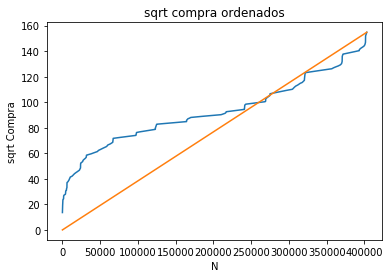

In [21]:
transformed_sqrt = np.sqrt(data_y_train.sort_values())

plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    transformed_sqrt,
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,transformed_sqrt.max(),
                num=data_y_train.shape[0])
)
plt.ylabel('sqrt Compra')
plt.xlabel('N')
plt.title('sqrt compra ordenados')
plt.show()

### R:
Principalmente nos sirven de caracter exploratorio (Cuantos datos tienen comportamiento similar) y pueden dar cierto insight sobre la linearidad del problema. Podemos intentar modelar el problema con alguna transformación que transforme el output a lineal, pero si nuestros datos no son capaces de explicar la linearidad del problema, puede que no funcione mucho.

#### 1.h 10-_fold_ sobre la potencia
Probaremos la utilidad real de realizar una transformación del target del tipo $P \gets P^{i}$ con $i \in [0,2]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estrucuta siguiente. Debe elegir un estimador del error de validación de cada modelo (_e.g._ mediana, promedio...) y comentar brevemente por qué eligio tal estimador. 
Luego grafique como varia el error de validación en función de _i_. 
Finalmente, con el mejor valor de $i$ encontrado, entrene un regresor lineal con todos los datos de entrenamiento y compare su densempeño con los modelos anteriores.
Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo? 

In [22]:
%%time

folds = KFold(10)
results = []
for i in range(1,21):
    folds_results = []
    for train_index, val_index in folds.split(x_tr):
        y_i = data_y_train.values**(i/10)
        y_tr_i = y_i[train_index]
        y_val_i = y_i[val_index]
        
        x_tr_i = x_tr[train_index]
        x_val_i = x_tr[val_index]
        reg_i = LinearRegression()
        reg_i.fit(x_tr_i,y_tr_i)
        
        train_score = reg_i.score(x_tr_i,y_tr_i)
        val_score = reg_i.score(x_val_i,y_val_i)
        
        folds_results.append(val_score)
    results.append({'i':i,'mean':np.mean(folds_results),'std':np.std(folds_results),'folds':folds_results})
results = pd.DataFrame(results)

CPU times: user 5min 15s, sys: 6.91 s, total: 5min 22s
Wall time: 54.2 s


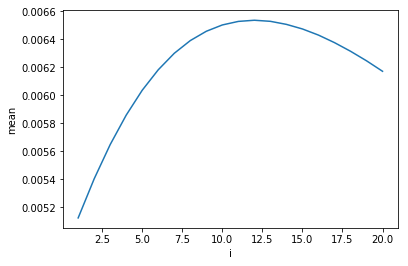

In [23]:
sns.lineplot(x='i',y='mean',ci='std',data=results)
plt.show()

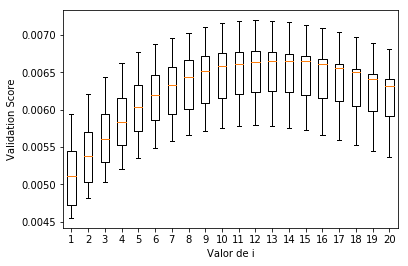

In [24]:
aux = []
for i in range(0,20):
    aux.append(results.iloc[i,:]['folds'])
plt.boxplot(aux)
plt.ylabel('Validation Score')
plt.xlabel('Valor de i')
plt.show()

In [25]:
best_model = results.sort_values('mean',ascending=False).iloc[0]
best_model[['i','mean','std']]

i                12
mean      0.0065366
std     0.000440579
Name: 11, dtype: object

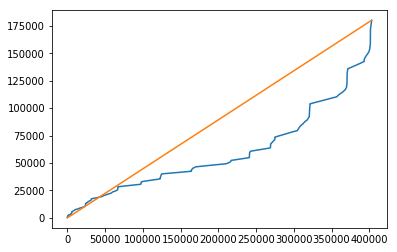

In [26]:
best_i = best_model['i']
transformed_recip = data_y_train.sort_values()**(best_i/10)

plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    transformed_recip,
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,transformed_recip.max(),
                num=data_y_train.shape[0])
)

plt.show()

In [27]:
best_i_reg = LinearRegression()
best_i_reg.fit(data_x_train,data_y_train.values**(best_i/10))
train_score = best_i_reg.score(data_x_train,data_y_train.values**(best_i/10))
val_score = best_i_reg.score(data_x_val,data_y_val.values**(best_i/10))
test_score = best_i_reg.score(data_x_test,data_y_test.values**(best_i/10))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006686, validation score:0.007358, test score:0.006357


### R:

Hay una leve mejora con los el mejor i ($i=11$), pero denuevo, hay que evaluar con algun test de significancia estadistica, para evaluar si esta diferencia es significativa.

#### 1.i _Q-Q plot_
Gráfique el _Quantile-Quantile Plot_ del residuo (error) de validación del merjo modelo que haya encontrado. Qué puede decir respecto al supuesto de normalidad de los residuos en los datos? 

((array([-4.29855253, -4.09768627, -3.9883572 , ...,  3.9883572 ,
          4.09768627,  4.29855253]),
  array([ 8159.06886963,  8159.50404147,  8159.51568352, ...,
         10261.27032477, 10261.61617397, 10261.6260095 ])),
 (403.163136076286, 9340.13690378965, 0.9913519654894437))

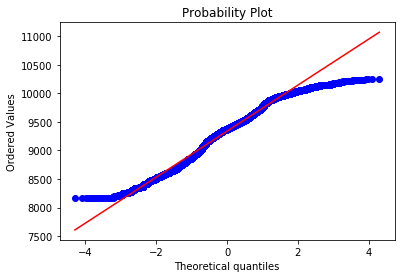

In [28]:
q_reg = LinearRegression()
q_reg.fit(data_x_train,data_y_train.values.reshape(-1,1))
train_score = q_reg.score(data_x_train,data_y_train.values.reshape(-1,1))
val_score = q_reg.score(data_x_val,data_y_val.values.reshape(-1,1))
val_predict = q_reg.predict(data_x_val)
err = val_predict - y_val
stats.probplot(err.T[0] ,dist='norm', plot=plt)

In [29]:
print(train_score,val_score)

0.006655763994635744 0.007399488314519975


### R:

En este caso, no se cumple la normalidad de los datos, ya que los errores no siguen la recta.  esto puede ser por que las variables pueden no explicar la relacion con los datos de salida.

#### 1.j Variables categoricas
Entrene ahora el modelo que mejor resultado obtuvo pero esta vez utilizando todos los atributos, transformando las variables categoricas no binarias. Como las variables categóricas no se relacionan linealmente al _target_ (pues no representan un valor numérico), debe transformarlas a variables binarias de igual manera que se realizó con la variable "Occupation" en la parte 1.c. 
Debe cargar de nuevo el DataFrame original pues borramos las columnas de categoría de producto.
Discuta por qué podría resultar útil agregar de esta misma manera el dato "City_Category" y no como se hizo inicialmente. 
Discuta los resultados obtenidos en comparación con la parte anterior.

In [30]:
data = pd.read_csv("BlackFriday.csv")

occupation_dummies = pd.get_dummies(data.Occupation,prefix="occupation")
col = list(data.columns)
#col.remove('City_Category')
col.remove('Occupation')
data_pre = data[col]
#data_pre = data_pre.join(city_dummies)
data_pre = data_pre.join(occupation_dummies)
data = data.drop(columns=['User_ID','Product_ID']) 
data = data.fillna(value=0) # para las categorias que estan en NAN

gender_dict = {'F':1,'M':0}
data['Gender'] = data.Gender.apply(lambda x: gender_dict[x])

siccy = pd.get_dummies(data.Stay_In_Current_City_Years,prefix="siccy")
age = pd.get_dummies(data.Age,prefix="age")
city_dummies = pd.get_dummies(data.City_Category,prefix="city")
occupation_dummies = pd.get_dummies(data.Occupation,prefix="occupation")
Product_Category_1_dummies = pd.get_dummies(data.Product_Category_1,prefix="Product_Category_1")
Product_Category_2_dummies = pd.get_dummies(data.Product_Category_2,prefix="Product_Category_2")
Product_Category_3_dummies = pd.get_dummies(data.Product_Category_3,prefix="Product_Category_3")

col = list(data.columns)
col.remove('Stay_In_Current_City_Years')
col.remove('City_Category')
col.remove('Occupation')
col.remove('Age')
col.remove('Product_Category_1')
col.remove('Product_Category_2')
col.remove('Product_Category_3')

data_pre = data[col]
data_pre = data_pre.join(siccy)
data_pre = data_pre.join(age)
data_pre = data_pre.join(city_dummies)
data_pre = data_pre.join(occupation_dummies)
data_pre = data_pre.join(Product_Category_1_dummies)
data_pre = data_pre.join(Product_Category_2_dummies)
data_pre = data_pre.join(Product_Category_3_dummies)

data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
print("train:{:.2f}%, validation:{:.2f}%, test:{:.2f}%".format(len(data_pre_train)/len(data)*100,len(data_pre_val)/len(data)*100,len(data_pre_test)/len(data)*100))
data_x_train = data_pre_train.drop(columns='Purchase')
data_y_train = np.log(data_pre_train['Purchase'])

data_x_val = data_pre_val.drop(columns='Purchase')
data_y_val = np.log(data_pre_val['Purchase'])

data_x_test = data_pre_test.drop(columns='Purchase')
data_y_test = np.log(data_pre_test['Purchase'])

regresion = LinearRegression()
regresion.fit(data_x_train,data_y_train.values.reshape(-1,1))
train_score = regresion.score(data_x_train,data_y_train.values.reshape(-1,1))
val_score = regresion.score(data_x_val,data_y_val.values.reshape(-1,1))
test_score = regresion.score(data_x_test,data_y_test.values.reshape(-1,1))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train:75.00%, validation:15.00%, test:10.00%
train score:0.659867, validation score:0.662097, test score:0.659457


### R:

Mejoramos bastante el resultado de la regresion (0.006 a 0.665) codificando las variables de categoria del producto como dummy variables, en conjunto con hacer la transformacion logaritmica, cosa que trate de modelar la recta desde los 50000 en adelante. Cabe destacar que esto tambien puede estar influido en el train_test split que se realiza al azar, aca no aplicamos ninguna semilla para reproducir resultados